In [2]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import pandas as pd

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [4]:
def get_params(table):
    prot_seq = ProteinAnalysis(table.Sequence)
    params = [table.Protein_name,
              table.Sequence,
              len(table.Sequence),
              prot_seq.molecular_weight(),
              #np.log(X.molecular_weight()),
              prot_seq.instability_index(),
              prot_seq.isoelectric_point(),
              prot_seq.count_amino_acids()['D'] + prot_seq.count_amino_acids()['E'],
              prot_seq.count_amino_acids()['K'] + prot_seq.count_amino_acids()['R'] +
              prot_seq.count_amino_acids()['H'],
              prot_seq.count_amino_acids()['D'] + prot_seq.count_amino_acids()['E'] +
              prot_seq.count_amino_acids()['K'] + prot_seq.count_amino_acids()['R'] +
              prot_seq.count_amino_acids()['H'] + prot_seq.count_amino_acids()['S'] +
              prot_seq.count_amino_acids()['T'] + prot_seq.count_amino_acids()['N'] +
              prot_seq.count_amino_acids()['Q'] + prot_seq.count_amino_acids()['C'] +
              prot_seq.count_amino_acids()['G'] + prot_seq.count_amino_acids()['P'],
              prot_seq.count_amino_acids()['A'] + prot_seq.count_amino_acids()['V'] +
              prot_seq.count_amino_acids()['I'] + prot_seq.count_amino_acids()['L'] +
              prot_seq.count_amino_acids()['M'] + prot_seq.count_amino_acids()['F'] +
              prot_seq.count_amino_acids()['Y'] + prot_seq.count_amino_acids()['W'],
              prot_seq.secondary_structure_fraction()[0],
              prot_seq.secondary_structure_fraction()[1],
              prot_seq.secondary_structure_fraction()[2],
              #np.log(np.mean(X.molar_extinction_coefficient())),
              prot_seq.gravy(),
              prot_seq.aromaticity(),
              prot_seq.molar_extinction_coefficient()[0], # with reduced cysteines
              prot_seq.molar_extinction_coefficient()[1] # with disulfid bridges
              ]
              
      
    return params

In [52]:
proteins_seqs = pd.read_csv('File.tsv', sep='\t')

In [53]:
paramdf = proteins_seqs.apply(lambda x: get_params(x), axis=1, result_type="expand")

In [54]:
paramdf.columns=['Prot name', 'Prot seq', 'Length', 'Molecular weight', 'Instability index', 'Isoelectric point', '-aa', '+aa', 'Polar and Special', 'Hydrophobic', 'SS Helix', 'SS Turn', 'SS Sheet', 'gravy', 'aromaticity', 'Extinction coefficient 1', 'Extinction coefficient 2']

In [32]:
#paramdf.to_csv('DNA_mimic_main_prot_all_param.csv', sep ='\t', index=False)

In [55]:
paramdf

,Prot name,Prot seq,Length,Molecular weight,Instability index,Isoelectric point,-aa,+aa,Polar and Special,Hydrophobic,SS Helix,SS Turn,SS Sheet,gravy,aromaticity,Extinction coefficient 1,Extinction coefficient 2
0,WP_269371939.1_AcrF10_family_anti-CRISPR_prote...,MTTFRIENARIETITDFDMVIFDLVTDFGRVELAEHVNYDSDGDFK...,97,11086.4081,59.993814,4.050028,23,8,54,43,0.329897,0.154639,0.329897,-0.025773,0.082474,2980,3105
1,SFC49231.1_hypothetical_protein_SAMN02745723_1...,MNTFKIENARIEFITDDFDMVKFDLVTEKGRVELSEHVNYDSDGDF...,97,11187.4289,60.802062,4.179735,22,10,56,41,0.319588,0.175258,0.247423,-0.189691,0.113402,4470,4595
2,WP_136655849.1_AcrF10_family_anti-CRISPR_prote...,MARINSRKVRNIMNTFKIENARIEFITDDFDMVKFDLVTEKGRVEL...,109,12627.1609,62.492661,4.508492,22,14,63,46,0.311927,0.183486,0.238532,-0.244954,0.100917,4470,4595
3,6ANW_A_Crystal_structure_of_anti-CRISPR_protei...,GSMTTFRIENVRIETINDFDMVKFDLVTDLGRVELAEHVNYDSEGD...,99,11371.5965,44.824242,4.050028,23,8,55,44,0.343434,0.161616,0.292929,-0.124242,0.101010,5960,5960
4,WP_148535198.1_AcrF10_family_anti-CRISPR_prote...,MNTFRIENVRIETITDFDMVKFDLVTEIGRVELSEHVNYDGDGDFK...,97,11210.4839,68.448454,4.067876,24,9,56,41,0.350515,0.154639,0.278351,-0.082474,0.092784,2980,3105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,WP_239732583.1_MULTISPECIES:_SAUGI_family_urac...,MTLEKQLKHYITDLFSLPQNEEWQCEAIDEVANDVLPDKFCQNTPI...,108,13028.3895,32.521389,4.194854,18,9,62,46,0.388889,0.148148,0.203704,-0.483333,0.166667,21890,22015
415,WP_031775842.1_SAUGI_family_uracil-DNA_glycosy...,MTLSKQLKMYITERFQLNHQETWACETVDAVAEDVLPEKYIKNSPL...,112,13399.0970,32.863393,4.626205,20,14,62,50,0.392857,0.125000,0.276786,-0.304464,0.133929,17420,17545
416,ALN97938.1_uracil-DNA_glycosylase_inhibitor_[B...,MKFNISIISFIFTMIHKNNKRKHNLKRKDNSLMYKNIEDLNKFASK...,121,14316.2305,59.199174,5.446903,22,21,78,43,0.314050,0.223140,0.272727,-0.623967,0.090909,9970,9970
417,MBN2825253.1_hypothetical_protein_[Campylobact...,MLYIENFLMLSGDSKRKFFSYLDSLEWRVSHQIVLLNENALIVKFE...,98,11449.3081,35.197959,9.258708,13,19,52,46,0.397959,0.173469,0.285714,-0.061224,0.102041,9970,9970


In [56]:
paramdf.describe()

,Length,Molecular weight,Instability index,Isoelectric point,-aa,+aa,Polar and Special,Hydrophobic,SS Helix,SS Turn,SS Sheet,gravy,aromaticity,Extinction coefficient 1,Extinction coefficient 2
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000
mean,114.730310,13332.403564,41.368748,4.400155,25.071599,11.217184,67.088305,47.642005,0.326377,0.168915,0.295886,-0.483288,0.111133,18015.369928,18078.019093
std,38.571766,4504.543522,13.062656,0.660623,10.451741,5.183530,23.102731,16.292651,0.042878,0.045140,0.045314,0.236436,0.024360,8448.519903,8484.472343
min,17.000000,2005.275000,2.112121,4.050028,3.000000,0.000000,10.000000,7.000000,0.216495,0.076923,0.117647,-1.151515,0.025000,0.000000,0.000000
25%,86.500000,9997.239100,33.155278,4.050028,17.000000,8.000000,50.000000,36.000000,0.299606,0.136364,0.271107,-0.642542,0.094828,11460.000000,11460.000000
50%,114.000000,13424.673700,41.929600,4.144211,23.000000,10.000000,65.000000,48.000000,0.323171,0.166667,0.300000,-0.472093,0.115385,17420.000000,17420.000000
75%,142.500000,16554.215200,49.091599,4.552570,34.000000,14.000000,84.500000,58.500000,0.355342,0.198776,0.323215,-0.342464,0.127273,23380.000000,23505.000000
max,238.000000,27370.810900,84.580000,10.082033,48.000000,35.000000,148.000000,90.000000,0.500000,0.343750,0.476923,0.420000,0.178571,39880.000000,39880.000000


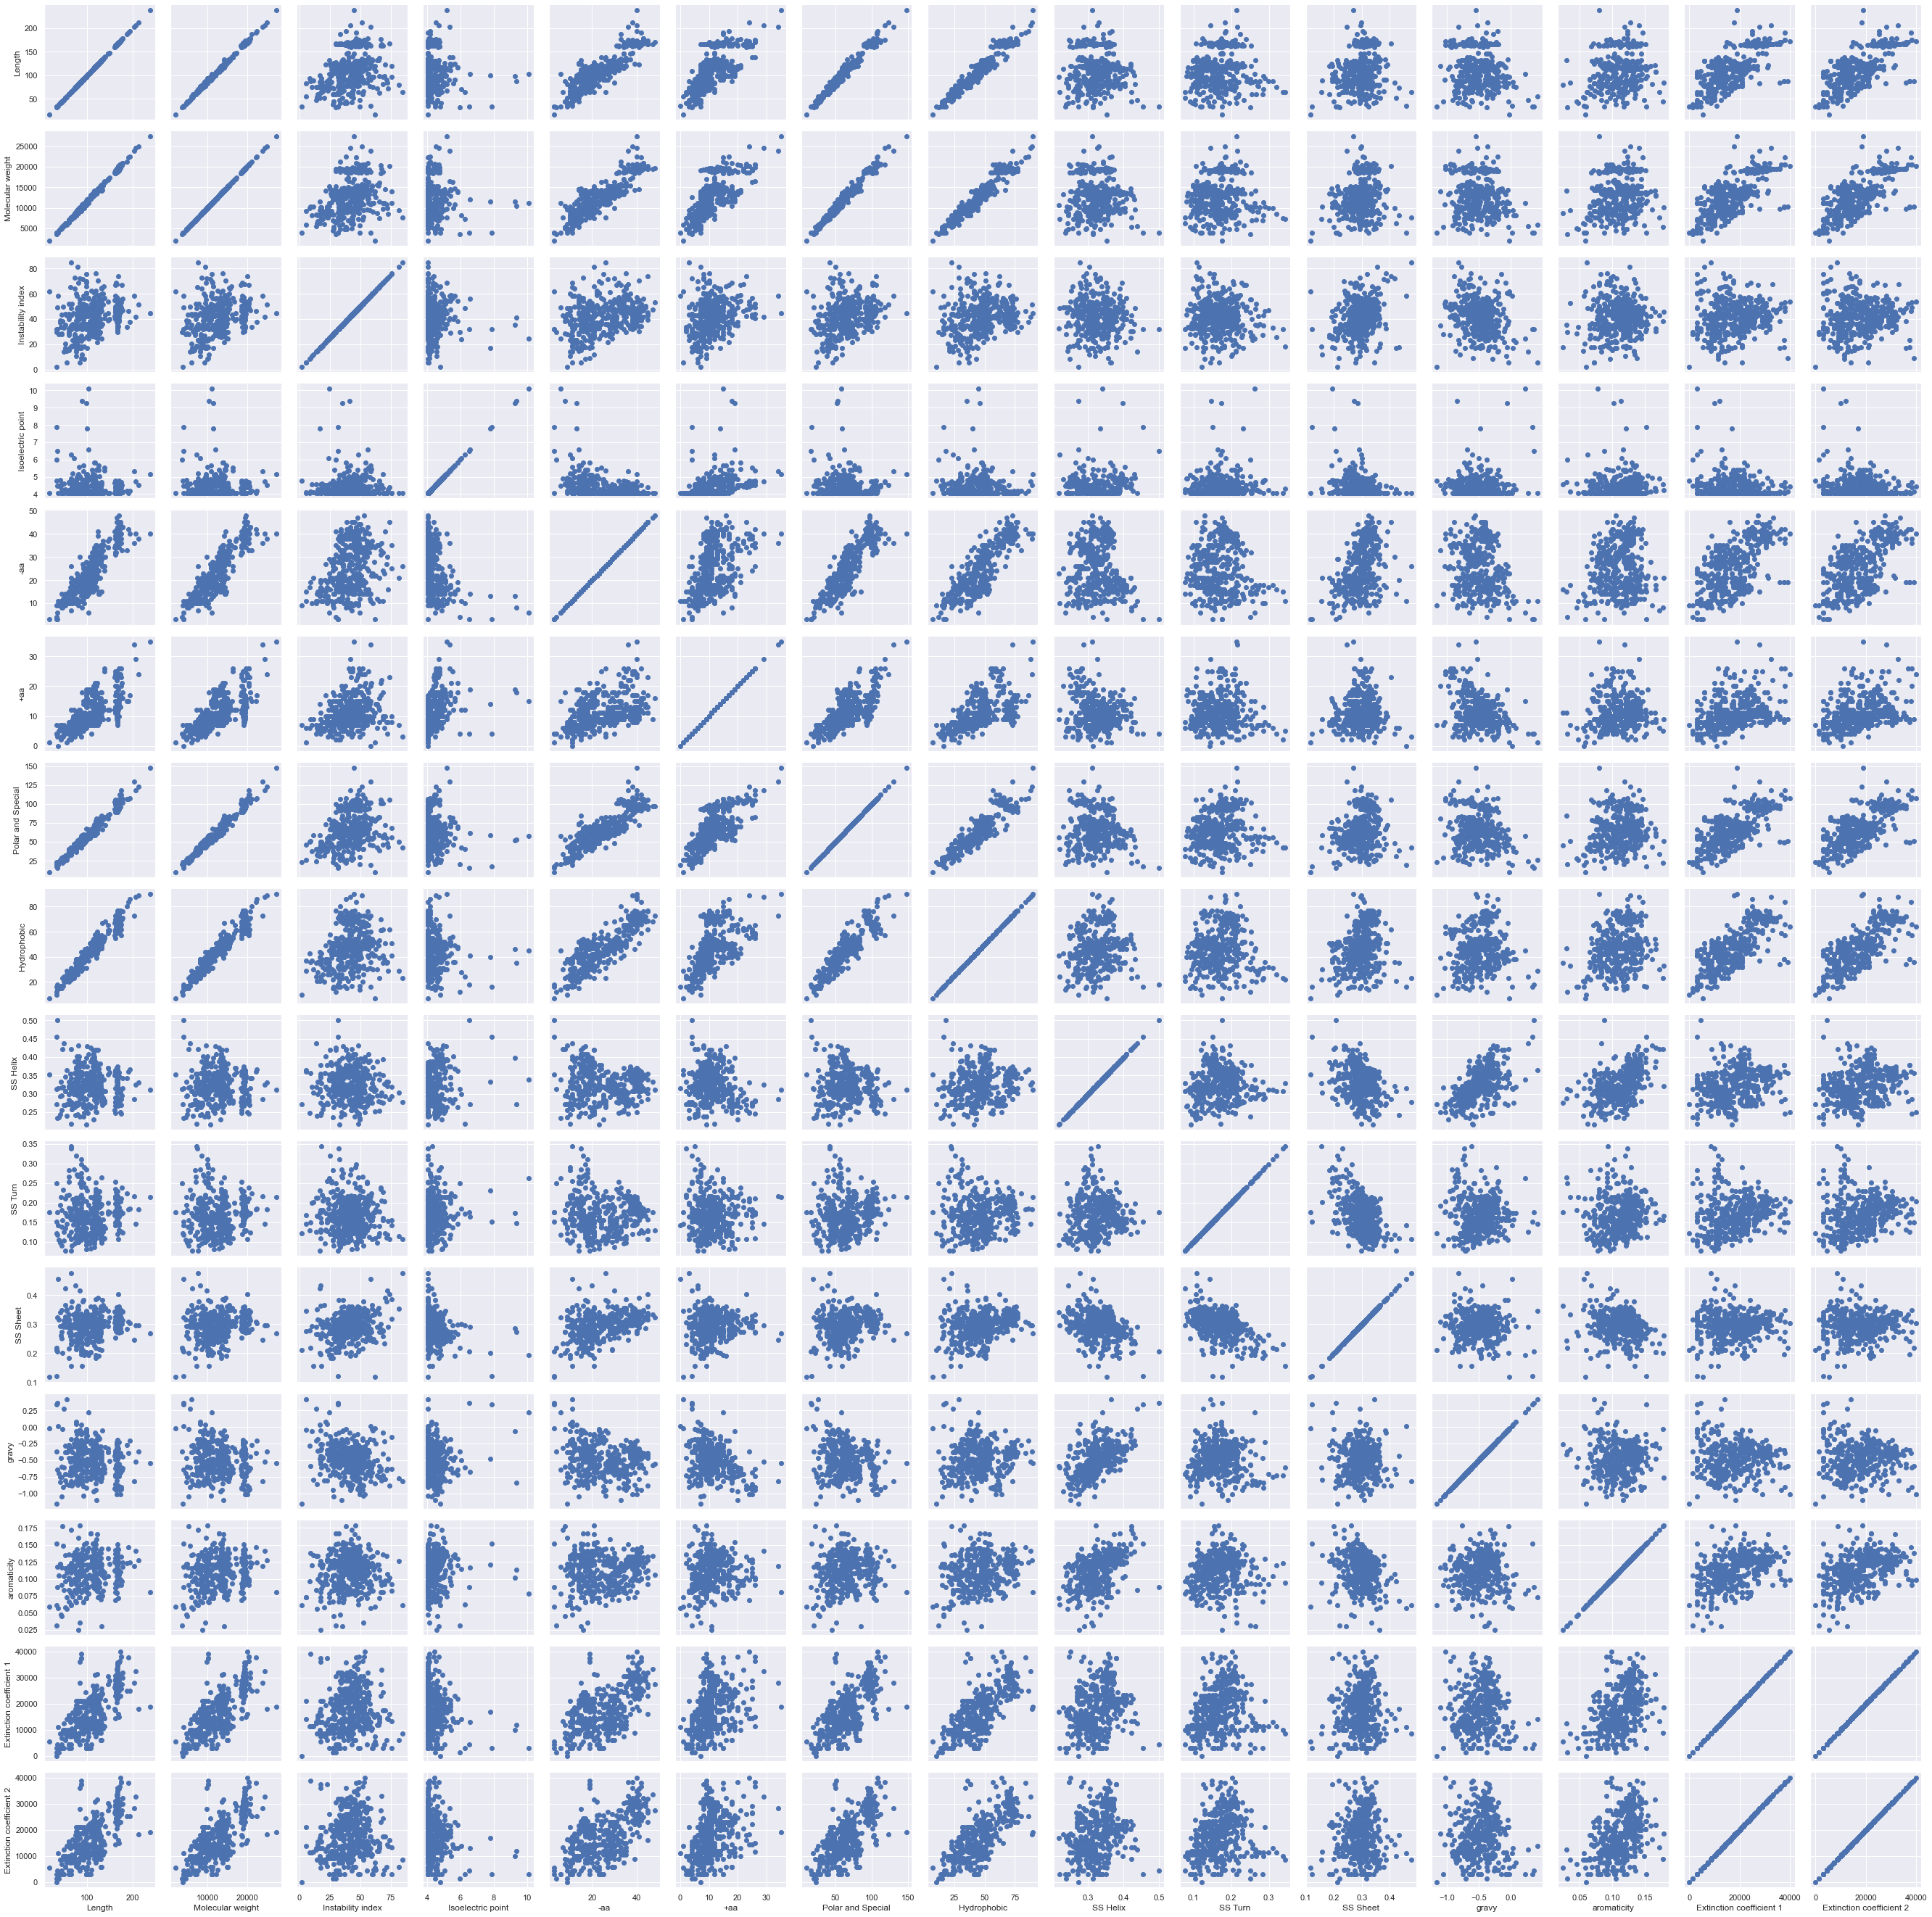

In [57]:
pair_grid_plot = sns.PairGrid(paramdf)
pair_grid_plot.map(plt.scatter)

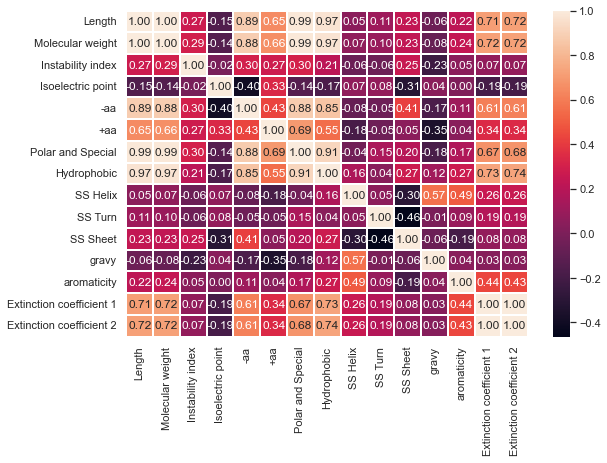

In [58]:
corr = paramdf.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

<AxesSubplot:ylabel='Frequency'>

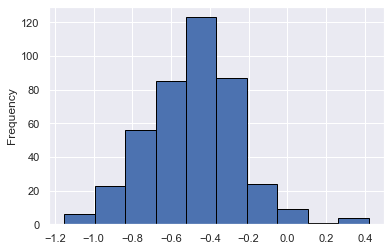

In [47]:
paramdf['gravy'].plot(kind='hist', edgecolor='black')


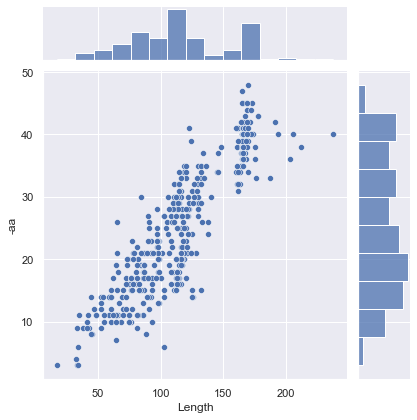

In [49]:
sns.jointplot(x = 'Length', y = '-aa', data = paramdf)

<AxesSubplot:xlabel='aromaticity', ylabel='Density'>

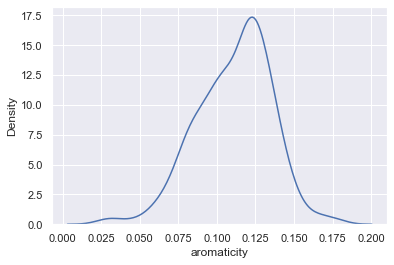

In [60]:
sns.kdeplot(paramdf['aromaticity'])

In [ ]:
'Length', 'Molecular weight', 'Instability index', 'Isoelectric point', '-aa', '+aa', 'Polar and Special', 'Hydrophobic', 'SS Helix', 'SS Turn', 'SS Sheet', 'gravy', 'aromaticity', 'Extinction coefficient 1', 'Extinction coefficient 2'